<h1>Projeto MLP: Classificação de sintomas de dor nas costas 🤕</h1> 

<p>Este projeto é parte da disciplina de Sistemas Inteligentes. Nele trabalharemos com a base de dados "Lower Back Pain Symptoms Dataset" com o objetivo de classificar os dados utilizando uma MLP.</p>

# Análise e tratamento de dados 🕵️

Nesta sessão iremos analisar nossa base de dados, buscando entender seus atributos, analisar possíveis anomalias e definir dados de treino, validação e teste.

Primeiramente vamos importar as bibliotecas necessárias sendo elas:
- Numpy: Operações matemáticas;
- Pandas: Manipulação de datasets;
- Sklearn: Modelos de machine learning.
- Seaborn/Matplotlib: Plotagem de gráficos

In [2568]:
# importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

Agora importamos a base de dados utilizando o pandas

In [2569]:
# Importando dados e visualizando algumas instâncias
df = pd.read_csv('./Dataset_spine.csv')
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


Como a coluna 'Unnamed:13' os rotúlos do dataset que não são útes para a classificação, então podemos remove-lá.

Nesse momento também separamos os atributos utilizados no treino da classificação


In [2570]:
df = df.drop(['Unnamed: 13'], axis=1)
y = df['Class_att']
X = df.drop(['Class_att'], axis=1)

Agora, verificamos se há dados faltantes em alguma das colunas

In [2571]:
print(df.isnull().sum())

Col1         0
Col2         0
Col3         0
Col4         0
Col5         0
Col6         0
Col7         0
Col8         0
Col9         0
Col10        0
Col11        0
Col12        0
Class_att    0
dtype: int64


 Como não encontramos nenhum NaN, podemos assumir que não há dados faltando em nenhuma das colunas, portanto não será necessário realizar tratamento para esses casos.
 Em seguida, vamos visualizar os outliers.

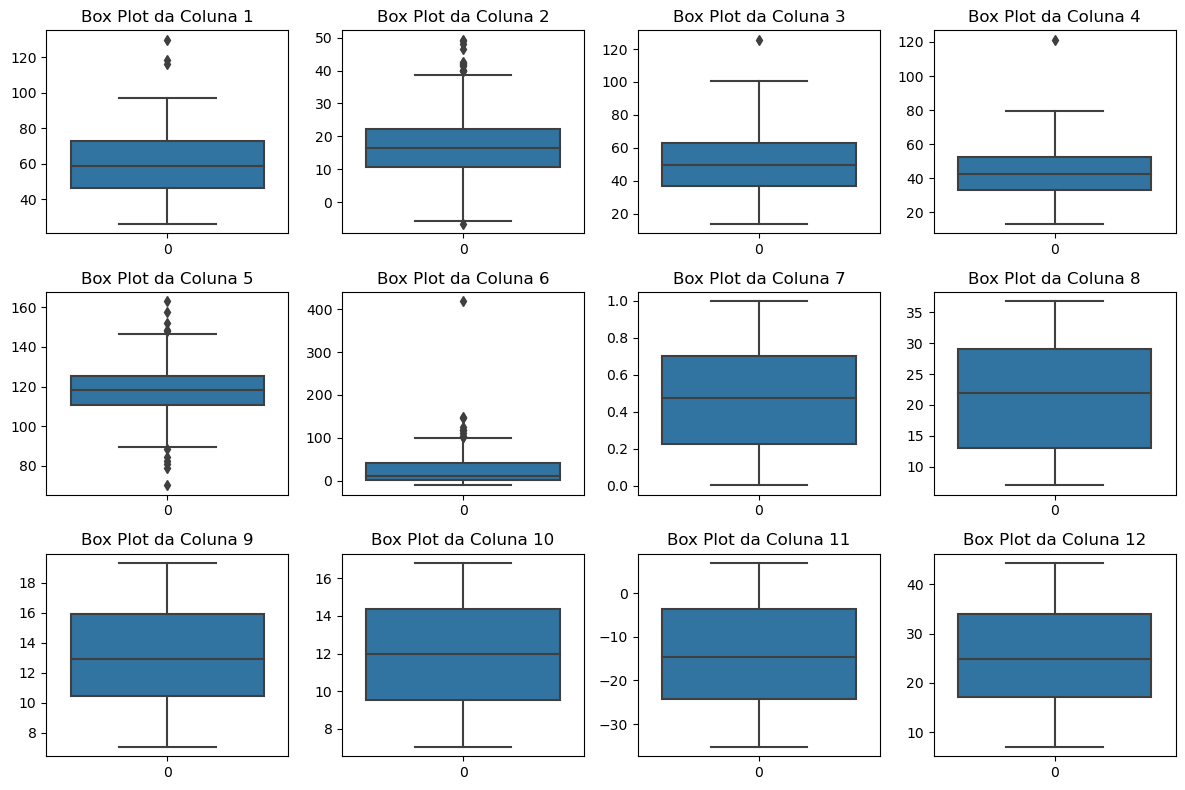

In [2572]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crie uma grade de subplots 3x4 (3 linhas e 4 colunas)
fig, axes = plt.subplots(3, 4, figsize=(12, 8))

# Itere pelas colunas e adicione os boxplots aos subplots
for col in range(1, 13):
    row = (col - 1) // 4  # Calcule a linha atual
    col_idx = (col - 1) % 4  # Calcule a coluna atual
    ax = axes[row, col_idx]  # Obtenha o subplot atual

    sns.boxplot(df[f'Col{col}'], ax=ax)
    ax.set_title(f'Box Plot da Coluna {col}')

# Ajuste o layout
plt.tight_layout()

# Exiba o gráfico
plt.show()

posições do outlier (vamos usar?)

In [2573]:
from scipy import stats
z = np.abs(stats.zscore(df['Col5']))
threshold = 3
# Position of the outlier
print(np.where(z > threshold))

(array([ 85, 167, 180]),)



# Primeiro Treino 💪

In [2574]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)

In [2575]:
model = MLPClassifier(verbose=True, max_iter=200, random_state=42)
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': True,
 'warm_start': False}

In [2576]:
model.fit(X_train, y_train)

Iteration 1, loss = 9.14051880
Iteration 2, loss = 4.57682924
Iteration 3, loss = 1.53778965
Iteration 4, loss = 1.33537791
Iteration 5, loss = 2.05037681
Iteration 6, loss = 2.42632378
Iteration 7, loss = 2.38434463
Iteration 8, loss = 2.00744251
Iteration 9, loss = 1.48166614
Iteration 10, loss = 0.96410622
Iteration 11, loss = 0.79835993
Iteration 12, loss = 0.95684753
Iteration 13, loss = 1.10449808
Iteration 14, loss = 1.09216063
Iteration 15, loss = 0.94657141
Iteration 16, loss = 0.75940368
Iteration 17, loss = 0.65240604
Iteration 18, loss = 0.67600439
Iteration 19, loss = 0.72364486
Iteration 20, loss = 0.74408429
Iteration 21, loss = 0.69965234
Iteration 22, loss = 0.62377801
Iteration 23, loss = 0.58285568
Iteration 24, loss = 0.58760147
Iteration 25, loss = 0.60278479
Iteration 26, loss = 0.60295384
Iteration 27, loss = 0.57420099
Iteration 28, loss = 0.54322406
Iteration 29, loss = 0.53795781
Iteration 30, loss = 0.54843396
Iteration 31, loss = 0.55019244
Iteration 32, los

/home/cadu/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42, verbose=True)

In [2577]:
y_pred = model.predict(X_test)

In [2578]:
model.score(X_test, y_test)

0.8064516129032258

In [2579]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Abnormal       0.87      0.83      0.85        41
      Normal       0.70      0.76      0.73        21

    accuracy                           0.81        62
   macro avg       0.78      0.80      0.79        62
weighted avg       0.81      0.81      0.81        62



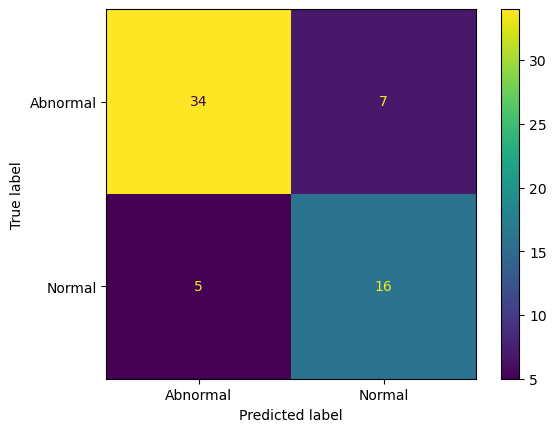

In [2580]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

In [2581]:
y_train.value_counts()

Abnormal    169
Normal       79
Name: Class_att, dtype: int64

Como é possível perceber pelo <i>classification report</i>, temos uma facilidade maior do modelo em classificar corretamente a classe de <i>'abnormal'</i> (sobretudo olhando a métrica de precisão). De fato, ao observar o a distribuição dos valores no dataset de treino, é possível reparar que temos mais ocorrências dessa classe, do que da classe 'normal'. É necessário, então, fazer o balanceamento das classes no dataset de treino

# Balanceamento de classes no dataset de treino

In [2582]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)  # Pode ajustar a estratégia de amostragem conforme necessário
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [2583]:
model = MLPClassifier(verbose=True, max_iter=200, random_state=42)
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': True,
 'warm_start': False}

In [2584]:
model.fit(X_train_resampled, y_train_resampled)

Iteration 1, loss = 6.32803432
Iteration 2, loss = 3.01651647
Iteration 3, loss = 1.31505361
Iteration 4, loss = 1.78455231
Iteration 5, loss = 2.15412629
Iteration 6, loss = 1.74631463
Iteration 7, loss = 1.13178680
Iteration 8, loss = 0.79359944
Iteration 9, loss = 0.88874829
Iteration 10, loss = 1.04184252
Iteration 11, loss = 1.00580396
Iteration 12, loss = 0.82290790
Iteration 13, loss = 0.67925823
Iteration 14, loss = 0.63366886
Iteration 15, loss = 0.65651465
Iteration 16, loss = 0.69366260
Iteration 17, loss = 0.65725759
Iteration 18, loss = 0.59971135
Iteration 19, loss = 0.55183872
Iteration 20, loss = 0.55454280
Iteration 21, loss = 0.56005234
Iteration 22, loss = 0.55051396
Iteration 23, loss = 0.52988730
Iteration 24, loss = 0.50729911
Iteration 25, loss = 0.49871290
Iteration 26, loss = 0.49737672
Iteration 27, loss = 0.49119763
Iteration 28, loss = 0.48007993
Iteration 29, loss = 0.47152685
Iteration 30, loss = 0.46737868
Iteration 31, loss = 0.46264215
Iteration 32, los

/home/cadu/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42, verbose=True)

In [2585]:
y_pred = model.predict(X_test)

In [2586]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Abnormal       0.91      0.78      0.84        41
      Normal       0.67      0.86      0.75        21

    accuracy                           0.81        62
   macro avg       0.79      0.82      0.80        62
weighted avg       0.83      0.81      0.81        62



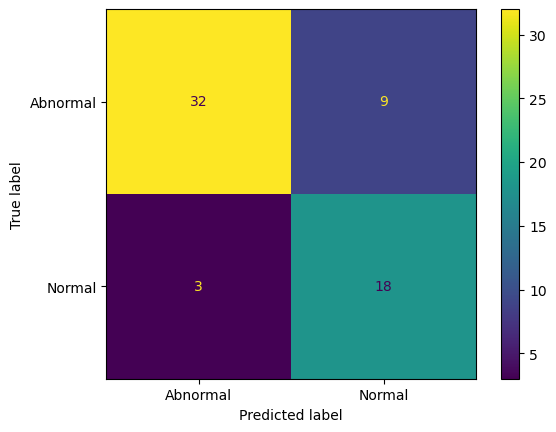

In [2587]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

In [2588]:
#WIP: removing outliers
from scipy import stats
outliers_removed = df[(np.abs(stats.zscore(X)) < 3).all(axis=1)]
outliers_removed.shape

(298, 13)

In [2589]:
y = outliers_removed['Class_att']
X = outliers_removed.drop(['Class_att'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)
model = MLPClassifier(verbose=True, max_iter=200, random_state=42)
# smote = SMOTE(sampling_strategy='auto', random_state=42)  # Pode ajustar a estratégia de amostragem conforme necessário
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


Iteration 1, loss = 9.26068715
Iteration 2, loss = 4.57920091
Iteration 3, loss = 1.52988891
Iteration 4, loss = 1.38432154
Iteration 5, loss = 2.12724785
Iteration 6, loss = 2.49206331
Iteration 7, loss = 2.42621711
Iteration 8, loss = 2.06857676
Iteration 9, loss = 1.57137653
Iteration 10, loss = 1.10296525
Iteration 11, loss = 0.86548157
Iteration 12, loss = 0.85590090
Iteration 13, loss = 0.97001123
Iteration 14, loss = 1.02037639
Iteration 15, loss = 0.94812904
Iteration 16, loss = 0.81640113
Iteration 17, loss = 0.73446947
Iteration 18, loss = 0.73096075
Iteration 19, loss = 0.74703459
Iteration 20, loss = 0.73459524
Iteration 21, loss = 0.69359508
Iteration 22, loss = 0.65189221
Iteration 23, loss = 0.65606889
Iteration 24, loss = 0.67631908
Iteration 25, loss = 0.67970151
Iteration 26, loss = 0.65561601
Iteration 27, loss = 0.61881023
Iteration 28, loss = 0.59853564
Iteration 29, loss = 0.60197528
Iteration 30, loss = 0.60180990
Iteration 31, loss = 0.58602028
Iteration 32, los

/home/cadu/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# using kfold
acho que nao funcionou mto bem

In [2590]:
kf = KFold(n_splits=3, shuffle=False)

In [2591]:
model = MLPClassifier(verbose=False)
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [2592]:
for i, (train_index, test_index) in enumerate(kf.split(X)):
  print(f"iteration {i}:")
  X_train = X.iloc[train_index]
  y_train = y.iloc[train_index]
  X_test = X.iloc[test_index]
  y_test = y.iloc[test_index]

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  print(classification_report(y_test, y_pred))

iteration 0:
              precision    recall  f1-score   support

    Abnormal       1.00      0.41      0.58       100
      Normal       0.00      0.00      0.00         0

    accuracy                           0.41       100
   macro avg       0.50      0.20      0.29       100
weighted avg       1.00      0.41      0.58       100

iteration 1:
              precision    recall  f1-score   support

    Abnormal       0.99      0.98      0.98        98
      Normal       0.00      0.00      0.00         1

    accuracy                           0.97        99
   macro avg       0.49      0.49      0.49        99
weighted avg       0.98      0.97      0.97        99

iteration 2:
              precision    recall  f1-score   support

    Abnormal       0.00      0.00      0.00       0.0
      Normal       0.00      0.00      0.00      99.0

    accuracy                           0.00      99.0
   macro avg       0.00      0.00      0.00      99.0
weighted avg       0.00      0.00  

/home/cadu/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/cadu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cadu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cadu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score

In [2593]:
y_pred = model.predict(X_test)

In [2594]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Abnormal       0.00      0.00      0.00       0.0
      Normal       0.00      0.00      0.00      99.0

    accuracy                           0.00      99.0
   macro avg       0.00      0.00      0.00      99.0
weighted avg       0.00      0.00      0.00      99.0



/home/cadu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cadu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cadu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cadu/anaconda3/lib/python3.11/site-p

In [2595]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2596]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred, y_test, pos_label=1)

/home/cadu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:769: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  y_true = y_true == pos_label


TypeError: 'bool' object is not subscriptable